<a href="https://colab.research.google.com/github/BobZhang26/AIPI-590-XAI-Assignment-4/blob/main/XAI_assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment # 4
### Description
### Bob Zhang

#### Click the badge below to direct to GitHub host:

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/BobZhang26/AIPI-590-XAI-Assignment-4/blob/main/XAI_assignment_4.ipynb)

In [21]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data
!rm -rf AIPI-590-XAI-Assignment-4
#!rm -rf AIPI-590---XAI-Assignment-3 2>/dev/null


# Clone GitHub files to colab workspace
repo_name = "AIPI-590-XAI-Assignment-4" # Change to your repo name
git_path = 'https://github.com/BobZhang26/AIPI-590-XAI-Assignment-4.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = "/content/AIPI-590-XAI-Assignment-4"
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{notebook_dir}"
# %ls
# print cwd
print(os.getcwd())
print(path_to_notebook)

# change working directory to notebook

rm: cannot remove './sample_data': No such file or directory


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cloning into 'AIPI-590-XAI-Assignment-4'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 64 (delta 25), reused 13 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (64/64), 327.65 KiB | 5.12 MiB/s, done.
Resolving deltas: 100% (25/25), done.
/content/AIPI-590-XAI-Assignment-4
/content/AIPI-590-XAI-Assignment-4
/content/AIPI-590-XAI-Assignment-4


In [22]:
!pip install --upgrade imodels scikit-learn --quiet

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import demo_helper
# hide warnings
import warnings
warnings.filterwarnings('ignore')
# high resolution of plot
%config InlineBackend.figure_format = 'retina'


from imodels import RuleFitClassifier, BoostedRulesClassifier,HSTreeClassifierCV

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 1. Loading Dataset
The Breast Cancer dataset is a commonly used dataset in machine learning and statistical research for binary classification tasks. It is part of the sklearn.datasets module in Scikit-learn and is often used for tasks like classification, model evaluation, and feature analysis. The dataset includes features derived from digitized images of fine needle aspirates (FNA) of breast masses, describing characteristics of the cell nuclei present in the images.

	•	Goal: The goal is to predict whether a breast tumor is benign or malignant based on various features extracted from breast mass images.
	•	Type: Supervised learning, Binary classification.
	•	Target Labels:
	•	0: Malignant (cancerous).
	•	1: Benign (non-cancerous).
	The dataset contains 30 numerical features that describe characteristics of cell nuclei present in the image. These features are computed for each cell nucleus and include:

	1.	Mean Radius: The average size of the cell nucleus.
	2.	Mean Texture: Variability in gray-scale intensity of the image.
	3.	Mean Perimeter: The average perimeter of the cell nucleus.
	4.	Mean Area: The average area of the cell nucleus.
	5.	Mean Smoothness: Local variation in the radius lengths.
	6.	Mean Compactness: Combination of perimeter² / area - 1.
	7.	Mean Concavity: Severity of concave portions of the contour.
	8.	Mean Concave Points: Number of concave portions of the contour.
	9.	Mean Symmetry: Symmetry of the cell nucleus.
	10.	Mean Fractal Dimension: Coastline approximation - 1.
Shape of the Dataset:

	•	Number of Samples (n_samples): 569
	•	Number of Features (n_features): 30
	•	Number of Classes (n_classes): 2 (Malignant, Benign)

In [24]:
# load iris dataset and split it into training and testing
load_breast_cancer = load_breast_cancer()
X = load_breast_cancer.data
y = load_breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2.1 RuleFitClassifier

In [25]:
# initialize RuleFitRegressor and fit the training data
clf = RuleFitClassifier() # Use OneVsRestClassifier for multiclass
clf.fit(X_train, y_train)

RuleFitClassifier()

In [26]:
# Evaluation RuleFitClassifier
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# display feature names in visualize
feature_names = load_breast_cancer.feature_names

# visualize the model
#df = clf.visualize()  # Visualize the model
# display load breast cancer as a dataframe
# df_bc = pd.DataFrame(load_breast_cancer.data, columns=load_breast_cancer.feature_names)
# df_bc['target'] = load_breast_cancer.target
# df_bc.head()

# Create a dictionary mapping X* to feature names
rule_to_feature = {f"X{i+1}": feature for i, feature in enumerate(load_breast_cancer.feature_names)}

# Print the mapping
for rule, feature in rule_to_feature.items():
    print(f"{rule}: {feature}")

# plot the weights of top 5 rules

Accuracy: 0.9649122807017544
X1: mean radius
X2: mean texture
X3: mean perimeter
X4: mean area
X5: mean smoothness
X6: mean compactness
X7: mean concavity
X8: mean concave points
X9: mean symmetry
X10: mean fractal dimension
X11: radius error
X12: texture error
X13: perimeter error
X14: area error
X15: smoothness error
X16: compactness error
X17: concavity error
X18: concave points error
X19: symmetry error
X20: fractal dimension error
X21: worst radius
X22: worst texture
X23: worst perimeter
X24: worst area
X25: worst smoothness
X26: worst compactness
X27: worst concavity
X28: worst concave points
X29: worst symmetry
X30: worst fractal dimension


In [27]:
clf.visualize()
# for the column rule:
# split the string
# if element in dict.keys(), replace it with dict[element].values
# else, pass

,rule,coef
4,X4,-3.32
24,X24,-5.82
28,X28,-1.63
15,X15,21.30
50,X20 <= 16.79 and X27 <= 0.1556 and X3 <= 696.25,1.08
44,X10 <= 0.59155 and X7 <= 0.05053,0.59
49,X13 <= 48.42 and X21 <= 33.35 and X27 <= 0.1477,1.52
51,X13 <= 31.365 and X22 <= 117.45 and X27 <= 0.15795,0.82
46,X13 <= 48.7 and X23 <= 968.70001 and X24 <= 0.17765 and X7 <= 0.05066,1.53
45,X21 <= 29.795 and X22 <= 127.2 and X27 <= 0.14905,0.53


## 2.2 Boosted Stump

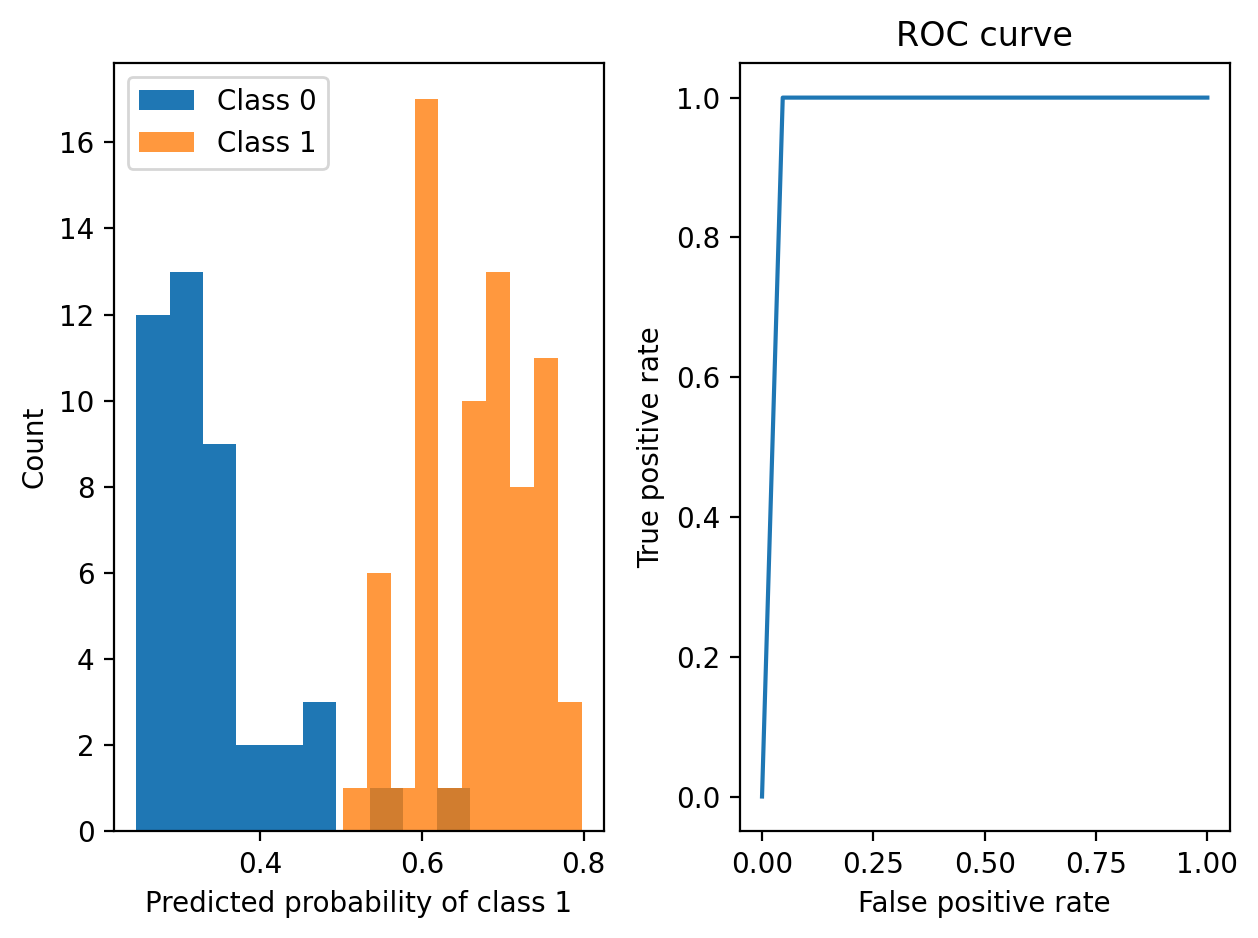

In [28]:
# fit boosted stumps
# get feature names from load_breast_cancer
feat_names = load_breast_cancer.feature_names
brc = BoostedRulesClassifier(n_estimators=10)
brc.fit(X_train, y_train, feature_names=feat_names)

# look at performance
probs = brc.predict_proba(X_test)
demo_helper.viz_classification_preds(probs, y_test)

In [29]:
# calculate accuracy
y_pred = brc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9824561403508771


## 2.3 Hierarchical shrinkage wrapper

[Text(0.5, 0.9, 'mean concave points <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [0.371, 0.629]'),
 Text(0.2, 0.7, 'worst radius <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [0.06, 0.931]'),
 Text(0.35, 0.8, 'True  '),
 Text(0.1, 0.5, 'gini = 0.037\nsamples = 263\nvalue = [0.024, 0.966]'),
 Text(0.3, 0.5, 'worst texture <= 19.91\ngini = 0.488\nsamples = 19\nvalue = [0.56, 0.408]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [0.057, 0.697]'),
 Text(0.4, 0.3, 'gini = 0.26\nsamples = 13\nvalue = [0.678, 0.191]'),
 Text(0.8, 0.7, 'worst concave points <= 0.147\ngini = 0.204\nsamples = 173\nvalue = [0.868, 0.118]'),
 Text(0.65, 0.8, '  False'),
 Text(0.7, 0.5, 'worst perimeter <= 115.25\ngini = 0.5\nsamples = 35\nvalue = [0.466, 0.488]'),
 Text(0.6, 0.3, 'worst texture <= 27.43\ngini = 0.298\nsamples = 22\nvalue = [0.197, 0.692]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 18\nvalue = [0.059, 0.793]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0.701, 0.023]'),
 Text(0.8, 0

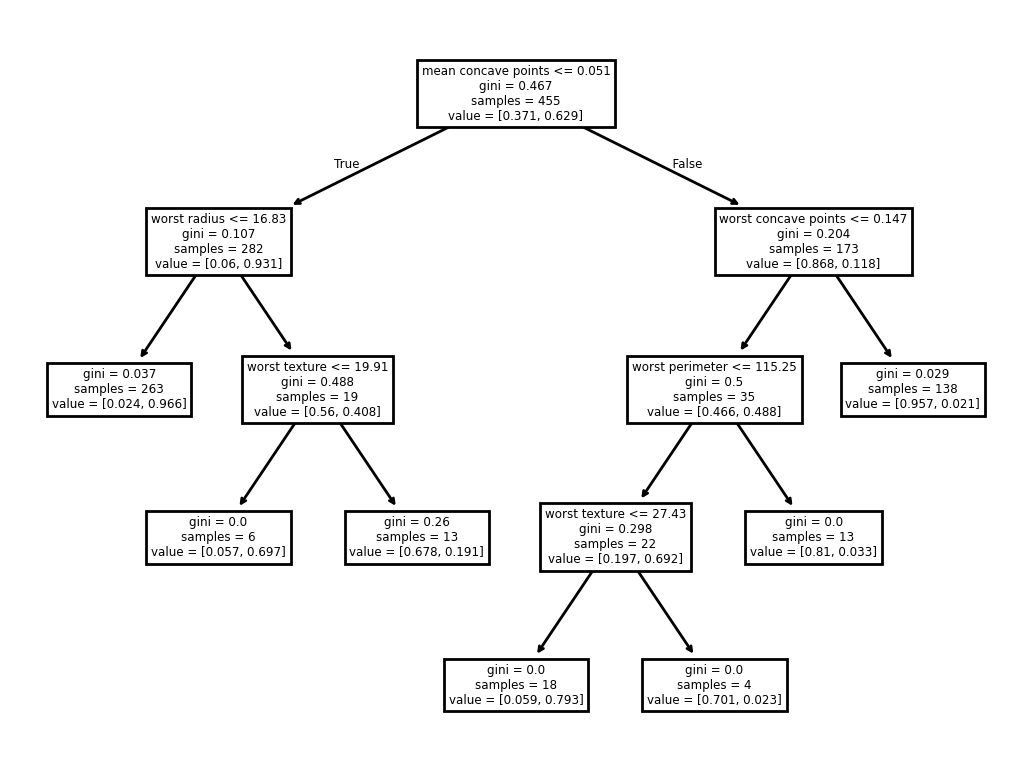

In [30]:
# fit the model
HSTC = HSTreeClassifierCV(max_leaf_nodes=7)  # initialize a model
HSTC.fit(X_train, y_train)   # fit model
preds = HSTC.predict(X_test) # discrete predictions: shape is (n_test, 1)
preds_proba = HSTC.predict_proba(X_test) # predicted probabilities: shape is (n_test, n_classes)

# visualize the model
plot_tree(HSTC.estimator_, feature_names=feat_names)

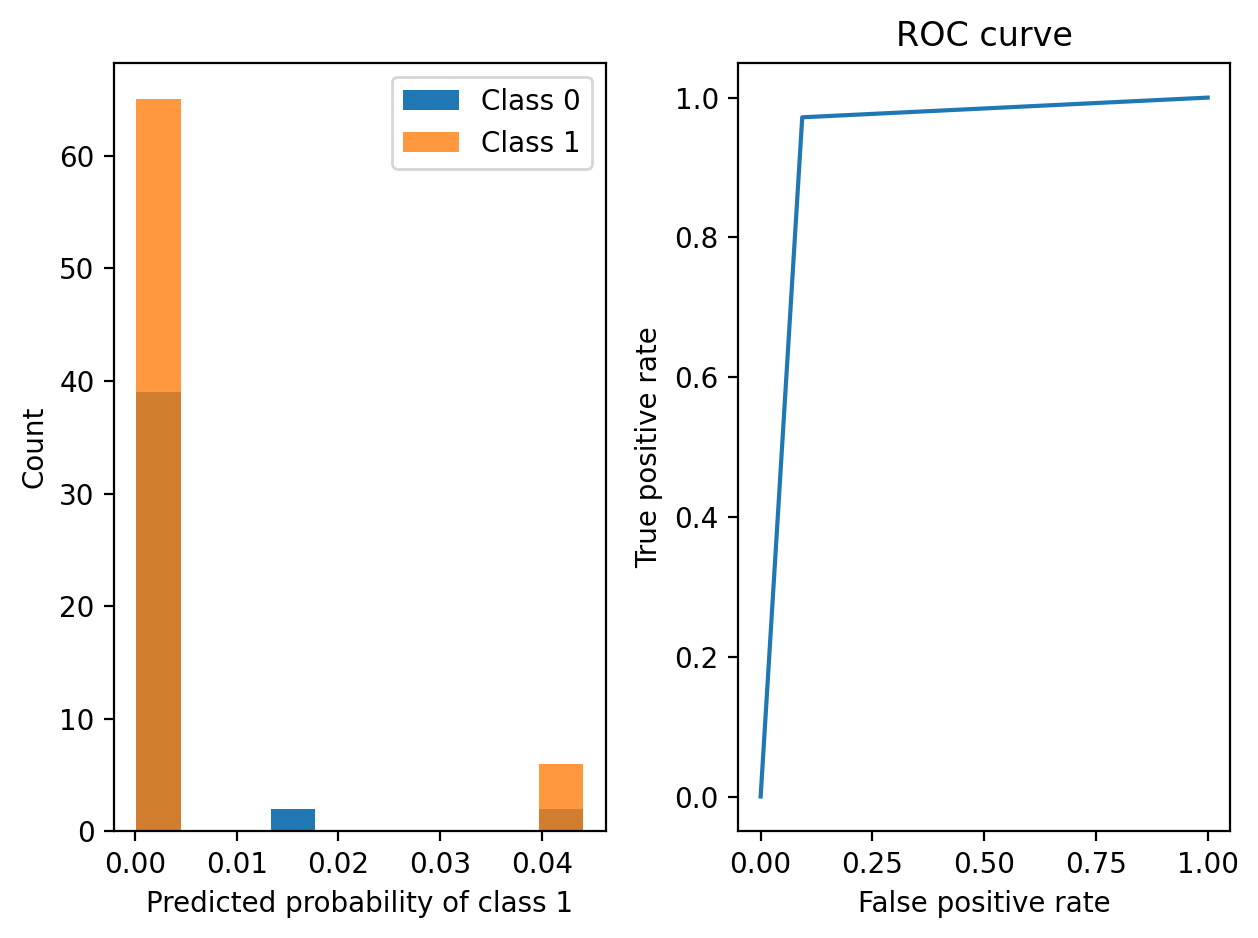

In [31]:
# look at performance
probs = HSTC.predict_proba(X_test)
demo_helper.viz_classification_preds(probs, y_test)

In [32]:
# calculate accuracy
y_pred = HSTC.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9473684210526315
